In [59]:
import pandas as pd
from sklearn.decomposition import PCA
from plotnine import (
    ggplot,
    aes,
    geom_point,
    geom_smooth,
    geom_jitter,
    facet_grid,
    facet_wrap,
    geom_histogram,
    geom_bar,
    geom_tile,
    theme,
    element_text
)
import seaborn as sns
import numpy as np

In [19]:
df = pd.read_csv("../data/train.csv", index_col="SEQN")
df.head()

,self_eval,teacher_eval,extracurricular,district,SRP_1,SRP_2,SRP_3,SRP_4,SRP_5,SRP_6,...,SRP_42,SRP_43,SRP_44,SRP_45,SRP_46,SRP_47,SRP_48,SRP_49,SRP_50,y
SEQN,,,,,,,,,,,,,,,,,,,,,
969167,4,5,9,3,-0.181,-0.379,-0.164,0.080,0.378,1.581,...,-1.156,-0.730,-0.508,-0.497,0.224,0.412,-0.517,0.099,0.114,-1.315
188942,4,3,5,4,-0.126,1.603,1.021,0.489,-1.404,-0.955,...,-0.318,1.240,-1.993,2.021,-1.078,-0.277,0.802,0.253,-0.720,1.997
134058,1,2,8,5,0.724,-0.702,2.249,0.910,0.330,0.411,...,0.449,1.980,-0.401,-0.544,-0.944,1.592,0.875,-0.734,-2.336,3.709
124022,3,3,10,6,0.706,-0.302,1.023,-0.895,0.625,1.283,...,2.025,-2.289,-0.407,0.025,-0.515,0.408,1.380,-1.075,-2.451,1.155
685285,5,5,1,5,-0.350,-1.001,0.931,0.192,0.491,0.292,...,-0.118,-0.288,0.457,-0.566,0.822,-0.317,0.661,2.096,0.004,-1.960


In [20]:
pca = PCA(n_components=2)
cont_comp = pca.fit_transform(df.iloc[:, 4:-1])

plot_df = pd.DataFrame(cont_comp, columns=["x", "y"]).assign(z=df["y"].values)

plot_df

,x,y,z
0,0.222386,1.289152,-1.315
1,-0.808673,-0.330235,1.997
2,-1.456275,0.061056,3.709
3,-1.061923,-0.955904,1.155
4,-1.538012,0.332730,-1.960
...,...,...,...
7995,-0.870997,-0.936496,-0.139
7996,2.298663,-0.093062,0.394
7997,-0.263514,-0.342952,0.597
7998,-1.187119,0.553678,1.408


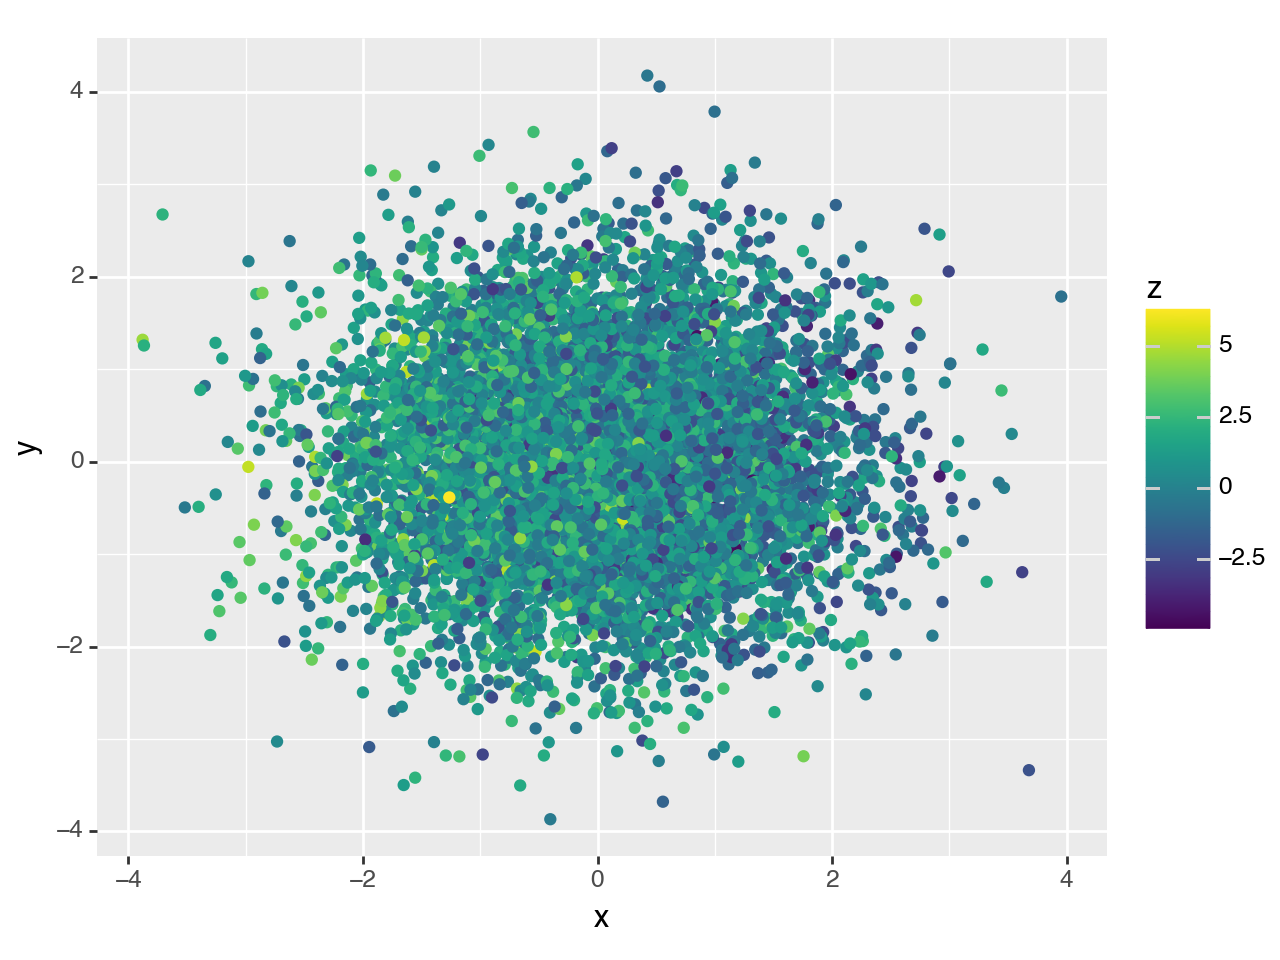

<Figure Size: (640 x 480)>

In [21]:
ggplot(data=plot_df, mapping=aes(x="x", y="y", color="z")) + geom_point()

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/stat_count.py:70: FutureWarning: The provided callable <function sum at 0x1079204a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/stat_count.py:70: FutureWarning: The provided callable <function sum at 0x1079204a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" 

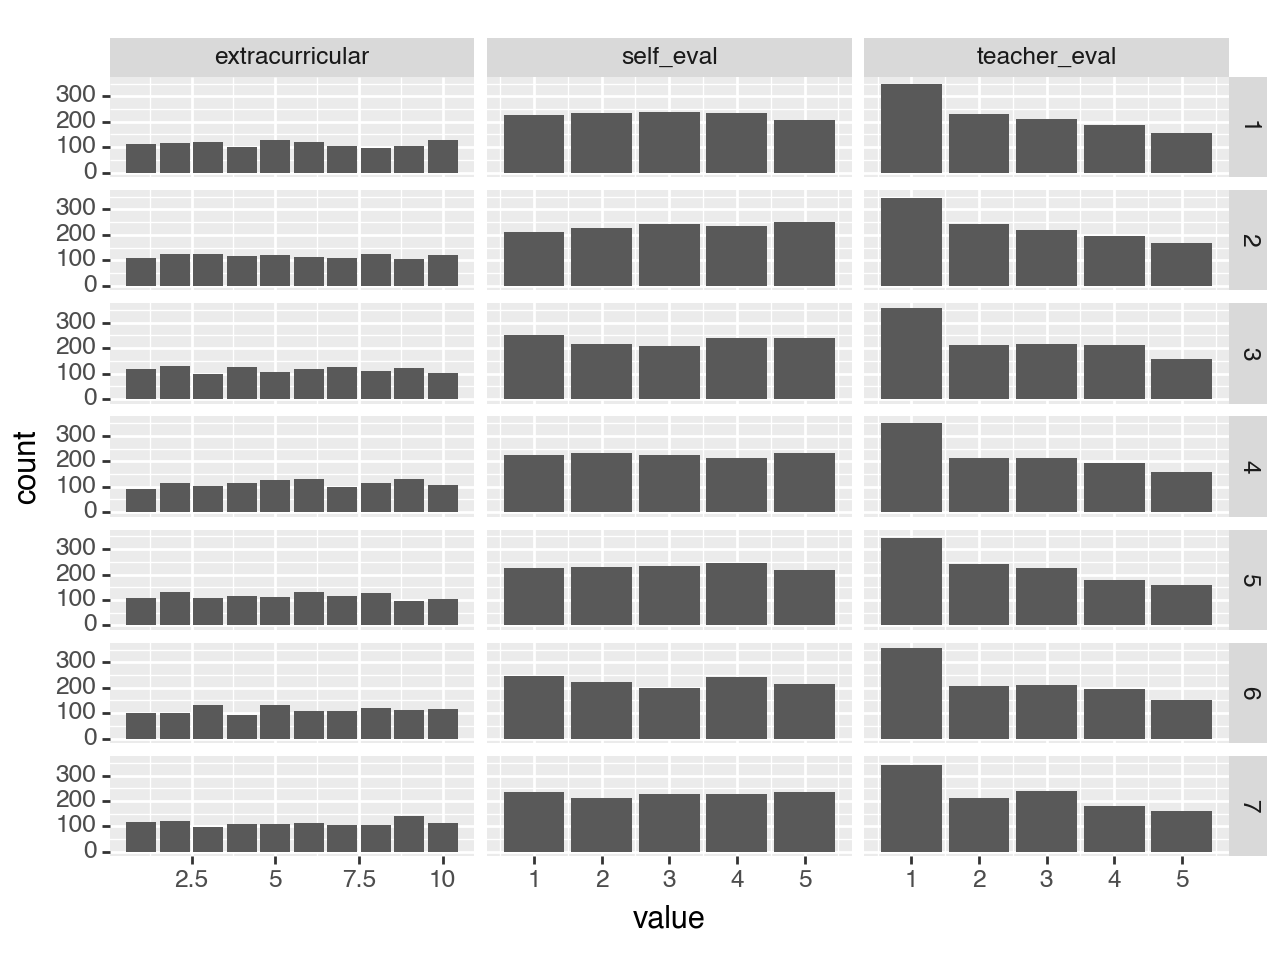

<Figure Size: (640 x 480)>

In [34]:
(
    ggplot(
        data=df[["self_eval", "teacher_eval", "extracurricular", "y", "district"]].melt(
            id_vars=["y", "district"]
        ),
        mapping=aes(x="value"),
    )
    + facet_grid("district ~ variable", scales="free_x")
    + geom_bar()
)

/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 292'. Pick better value with 'binwidth'.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x1079204a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
/Users/mcanearm/miniconda3/envs/ygtbkm/lib/python3.12/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum

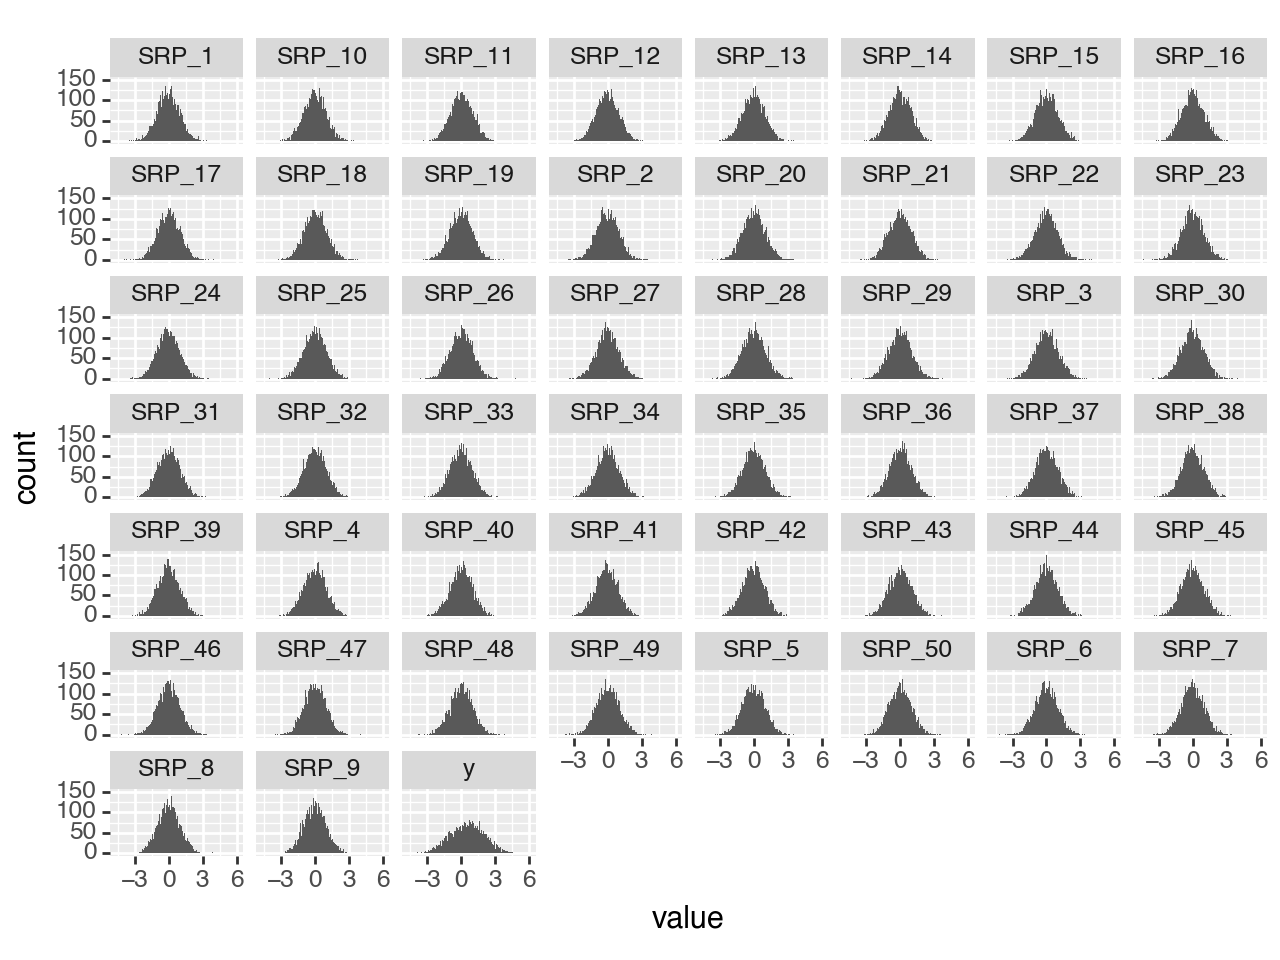

<Figure Size: (640 x 480)>

In [40]:
ggplot(data=df.iloc[:, 4:].melt(), mapping=aes(x="value")) + geom_histogram() + facet_wrap("~variable")

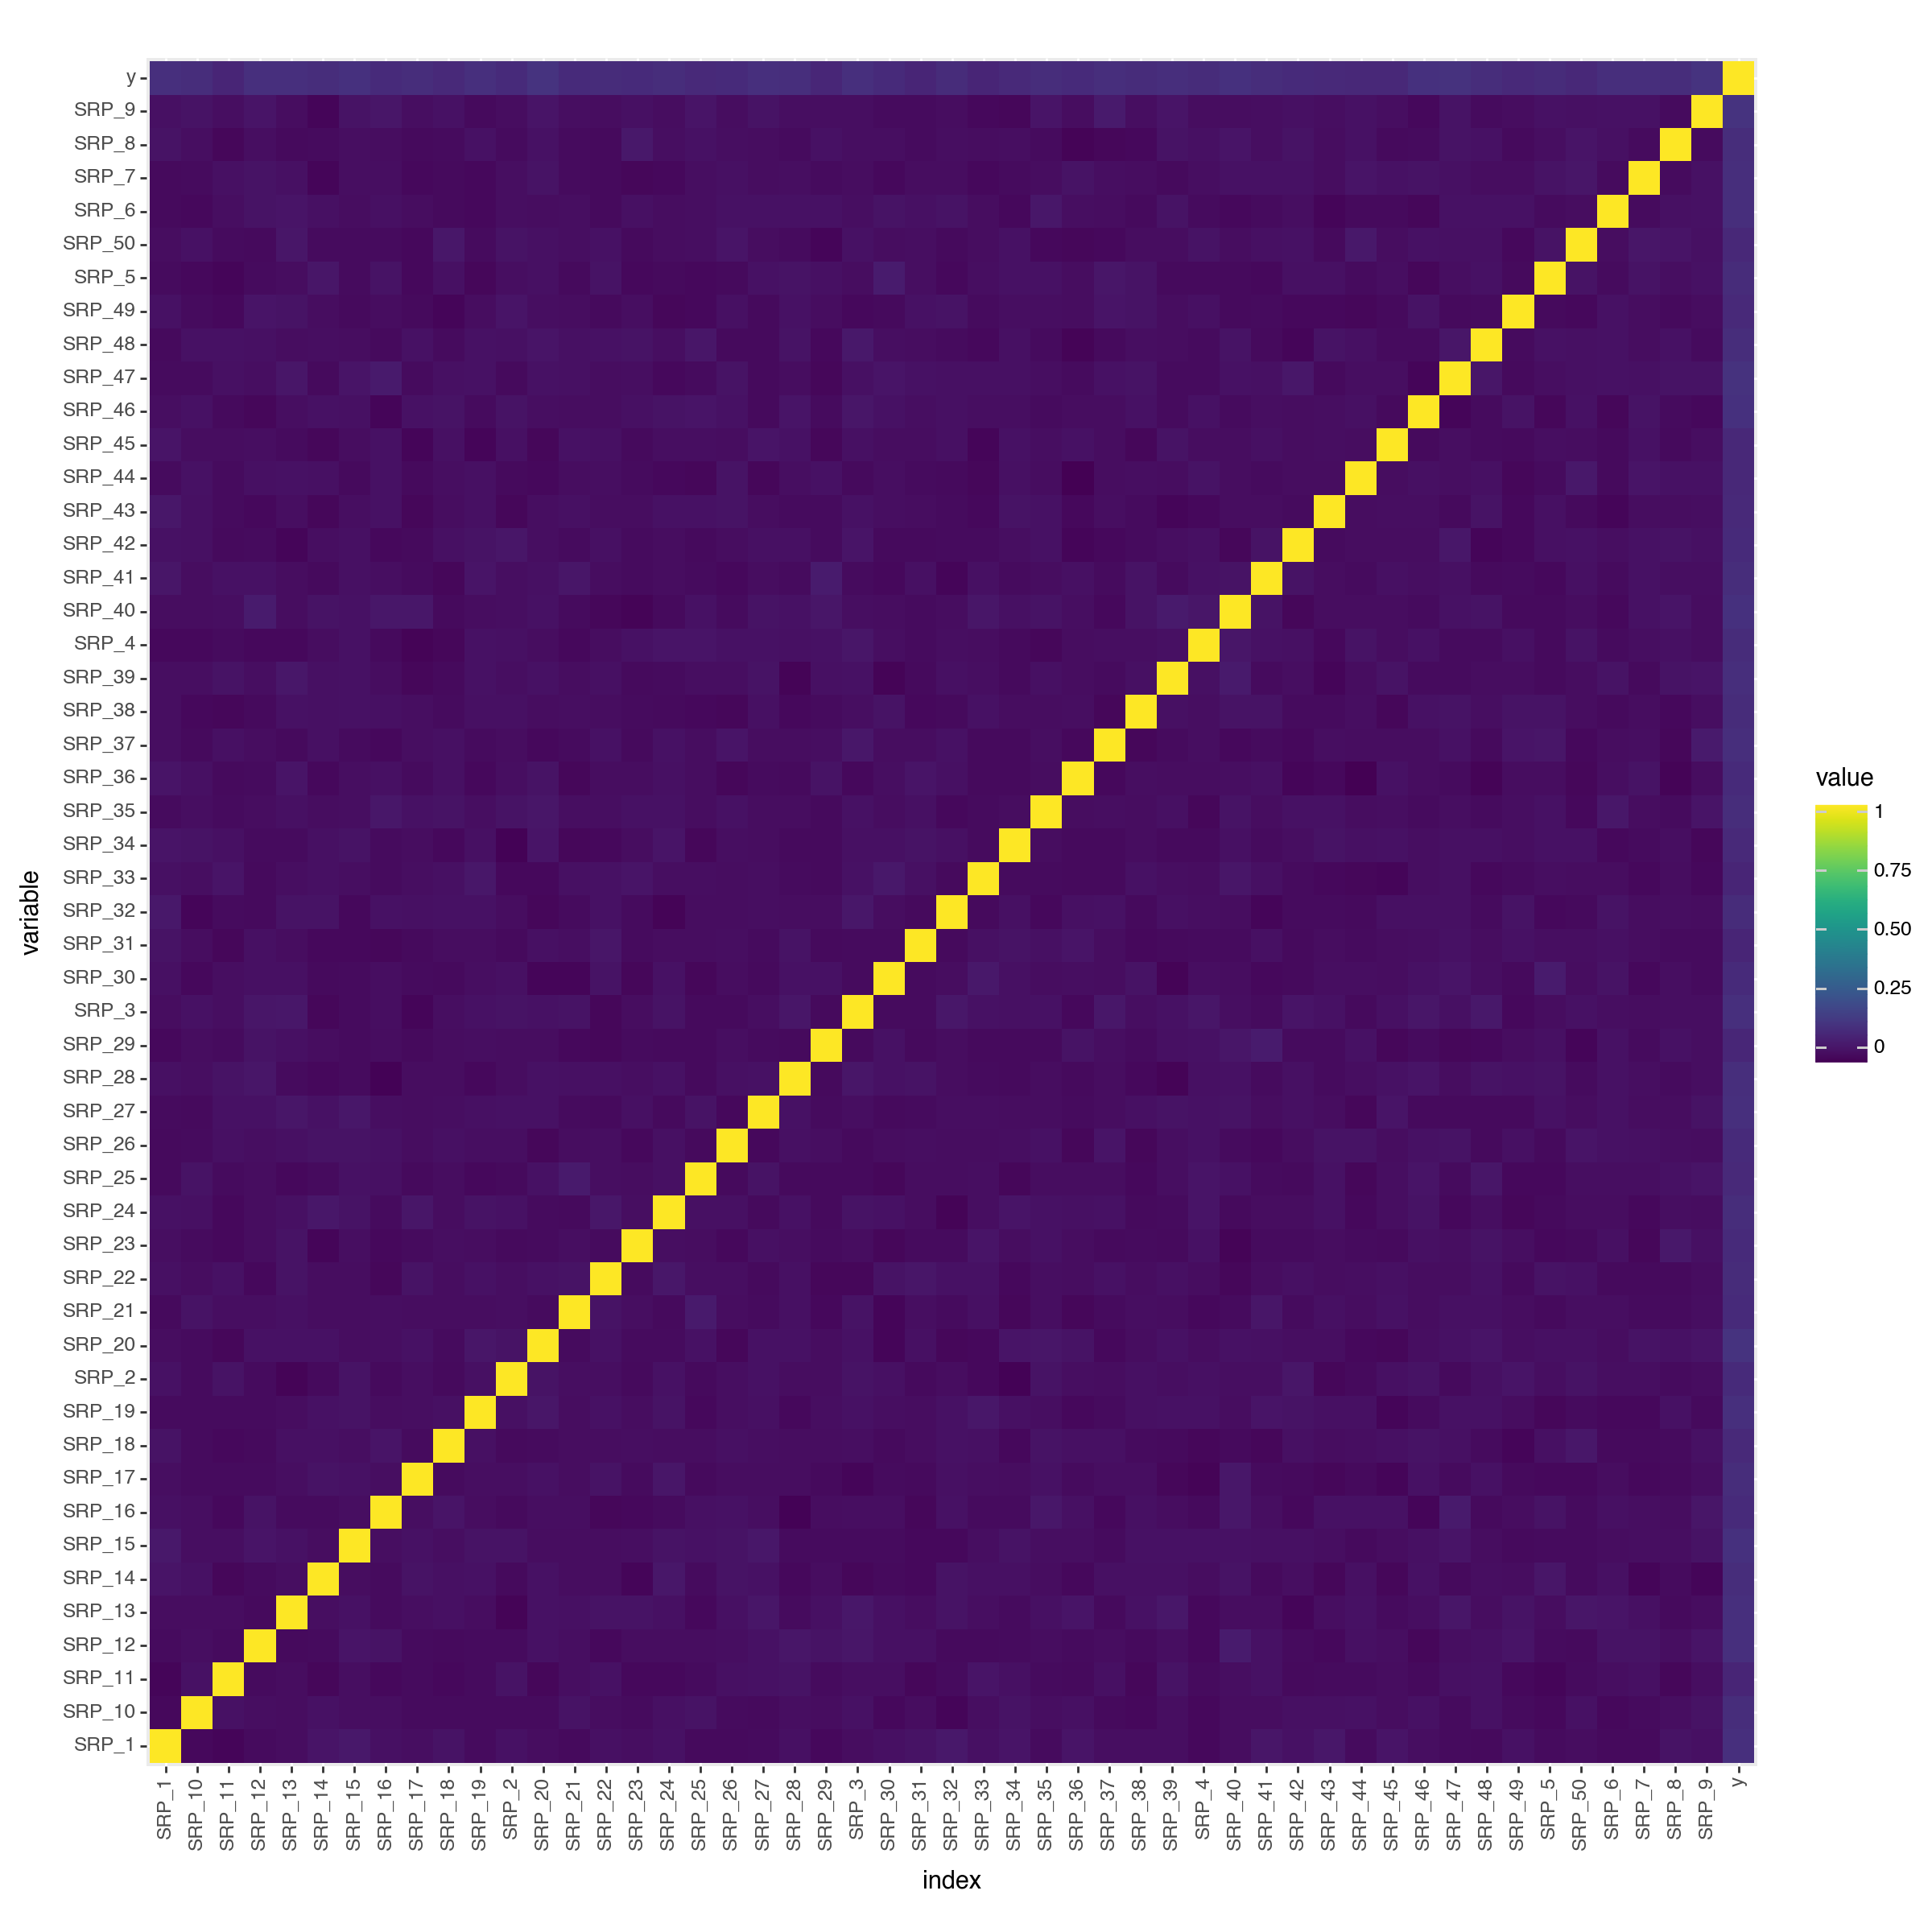

<Figure Size: (1200 x 1200)>

In [62]:
corrs = df.iloc[:, 4:].corr().reset_index().melt(id_vars="index")
ggplot(data=corrs, mapping=aes(x="index", y="variable", fill="value")) + geom_tile() + theme(figure_size=(12, 12), axis_text_x=element_text(angle=90))